In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

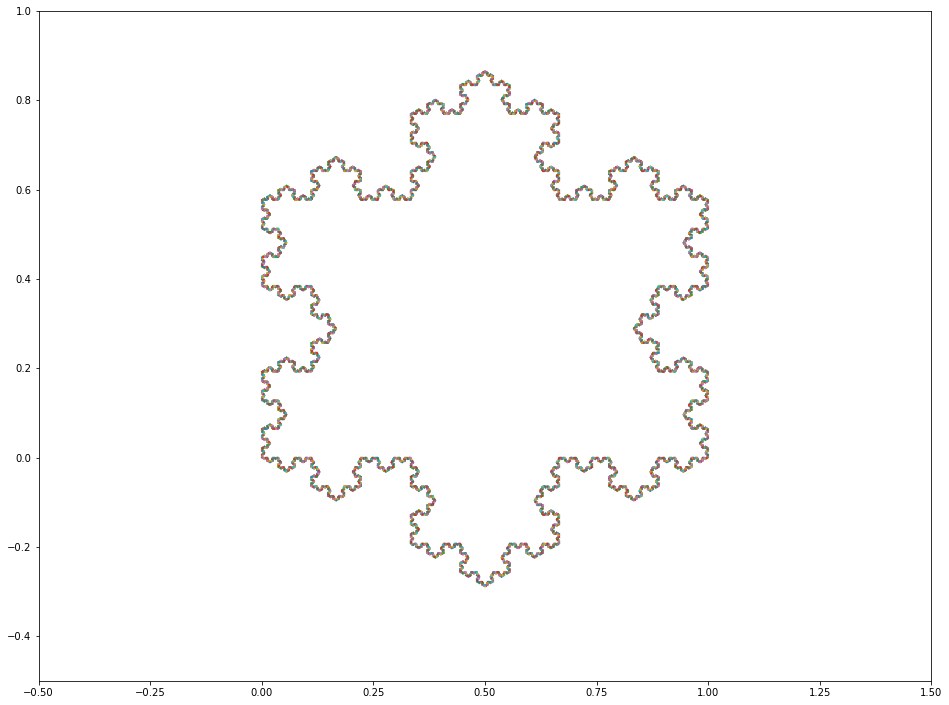

In [84]:
def koch(a, b, fi, n):
    if n <= 0:
        plt.plot([a.x, b.x], [a.y, b.y])
        return

    length = ((a.x - b.x) ** 2 + (a.y - b.y) ** 2) ** 0.5
    dl = length / 3

    a1 = Point(a.x + dl * np.cos(fi),
               a.y + dl * np.sin(fi))

    b1 = Point(a1.x + dl * np.cos(fi),
               a1.y + dl * np.sin(fi))

    c = Point(a1.x + dl * np.cos(fi + np.pi / 3),
              a1.y + dl * np.sin(fi + np.pi / 3))

    koch(a1, c, fi + np.pi / 3, n - 1)
    koch(c, b1, fi - np.pi / 3, n - 1)
    koch(a, a1, fi, n - 1)
    koch(b1, b, fi, n - 1)
        
        
a = Point(0, 0)
b = Point(0.5, 0.5 * 3 ** 0.5)
c = Point(1, 0)
fi1 = np.radians(60)
fi2 = np.radians(-60)
fi3 = np.radians(180)
n = 6
plt.figure(figsize=(16, 16))
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
koch(a, b, fi1, n)
koch(b, c, fi2, n)
koch(c, a, fi3, n)

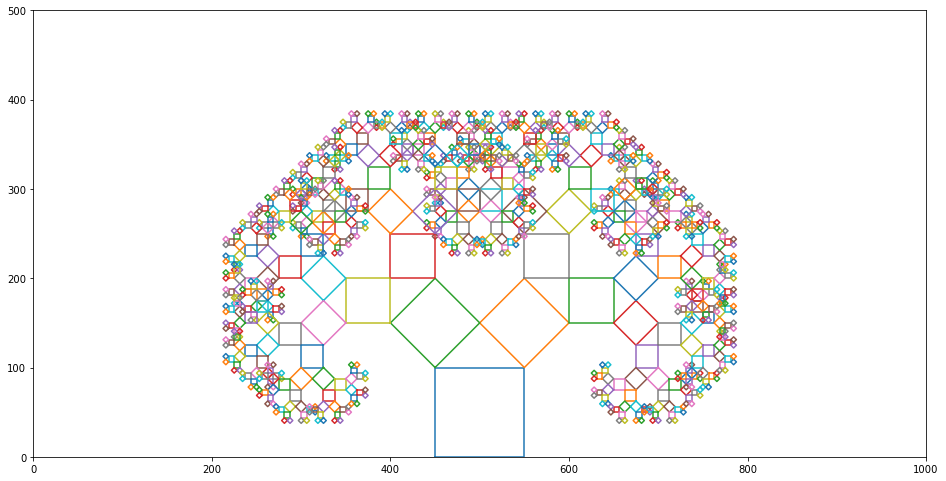

In [95]:
def tree(a, length, alpha, fi, n):
    if n == 0:
        return

    b = Point(a.x + length * np.cos(fi),
              a.y + length * np.sin(fi))

    c = Point(b.x + length * np.cos(fi + np.pi / 2),
              b.y + length * np.sin(fi + np.pi / 2))

    d = Point(a.x + length * np.cos(fi + np.pi / 2),
              a.y + length * np.sin(fi + np.pi / 2))

    length_a = length * np.cos(alpha0)
    length_b = length * np.cos(np.pi/2 - alpha0)

    e = Point(d.x + length_a * np.cos(alpha),
              d.y + length_a * np.sin(alpha))
        
    plt.plot([a.x, b.x, c.x, d.x, a.x], [a.y, b.y, c.y, d.y, a.y])
    tree(e, length_b, alpha - np.pi/2 + alpha0, alpha - np.pi / 2, n - 1)
    tree(d, length_a, alpha + alpha0, alpha, n - 1)
        

length = 100
alpha0 = np.radians(45)
a = Point((1000 - length) * (1 - alpha0/(np.pi/2)), 0)
fi = np.radians(0)
n = 10

plt.figure(figsize=(16, 16))
plt.xlim(0, 1000)
plt.ylim(0, 500)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
tree(a, length, alpha0, 0, n)

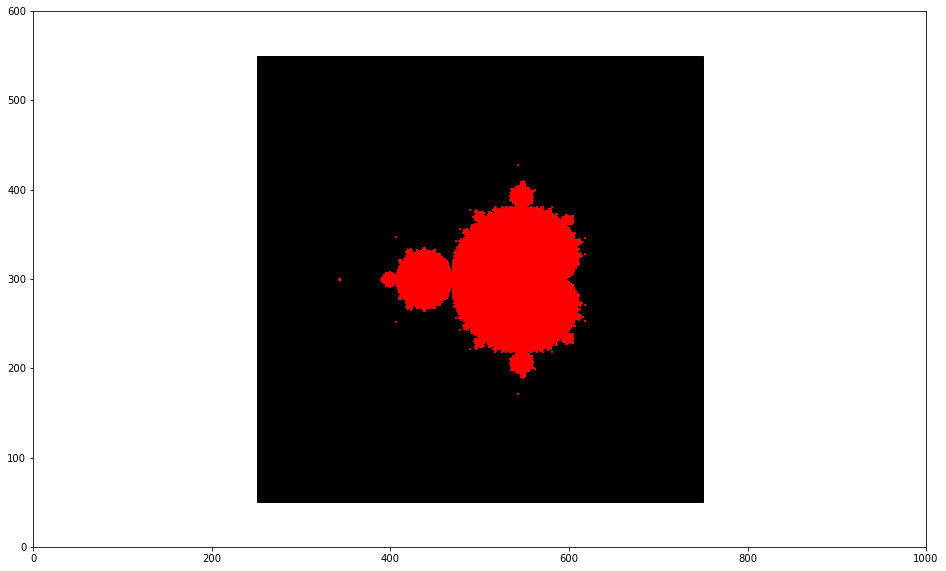

In [92]:
def mset():
    count_Re, count_Im = 500, 500
    count_iter = 100
    val_R = 1e+16

    image = np.full((count_Im, count_Re), True)
    Re_list = np.linspace(-2.5, 1.5, count_Re)
    Im_list = np.linspace(-2, 2, count_Im)

    for i, p in enumerate(Re_list):
        for j, q in enumerate(Im_list):
            c = p + q * 1j
            z = 0
            for k in range(count_iter):
                z = z ** 2 + c
                if abs(z) > val_R:
                    image[i, j] = False
                    break
                    
    size_x, size_y = count_Re, count_Im
    plt.figure(figsize=(16, 16))
    plt.xlim(0, 1000)
    plt.ylim(0, 600)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    pos_x = (1000 - size_x)/2
    pos_y = (600 - size_y)/2
    ax.add_patch(Rectangle((pos_x, pos_y), size_x, size_y, color='black'))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j]:
                ax.add_patch(Rectangle((i + pos_x,j + pos_y), 1, 1, color='red'))

                    
mset()